In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

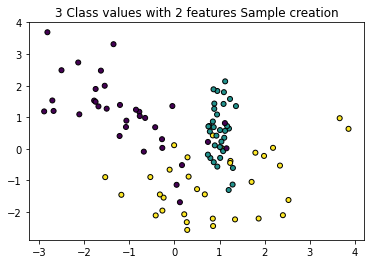

In [6]:
plt.title("3 Class values with 2 features Sample creation")

x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, \
                                          n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(x_features[:, 0], x_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [18]:
def visualize_boundary(model, x, y):
    fig, ax = plt.subplots()
    
    ax.scatter(x[:,0], x[:,1], c=y, s=25, cmap='rainbow', edgecolor='k',
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')   # tight : 모든 데이터를 볼 수 있도록 축의 범위를 크게 설정
    ax.axis('off')     # off : 축과 라벨을 끈다.
    xlim_start, xlim_end = ax.get_xlim()   # 축의 범위를 추출
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(x, y)
    
    # 격자행렬 생성
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    # 모델 예측, 격자 행렬 좌표값을 모델로 예측하여 contourf의 높이에 해당하는 z 구한다.
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    # 등고선 그리기 함수
    contours = ax.contourf(xx, yy, z, alpha=0.3,
                          level=np.arange(n_classes + 1) - 0.5,
                          cmap='rainbow', clim=(y.min(), y.max()),
                          zorder=1)

<ipython-input-18-9f982b54cfda>:17: UserWarning: The following kwargs were not used by contour: 'level', 'clim'
  contours = ax.contourf(xx, yy, z, alpha=0.3,


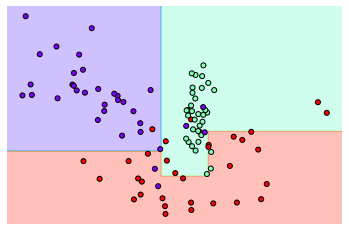

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

In [20]:
xx, yy = np.meshgrid(np.linspace(0, 100, num=200), np.linspace(0, 100, num=200))

In [27]:
print(xx.shape)

(200, 200)


In [28]:
print(xx.ravel().shape)

(40000,)


In [29]:
xx

array([[  0.        ,   0.50251256,   1.00502513, ...,  98.99497487,
         99.49748744, 100.        ],
       [  0.        ,   0.50251256,   1.00502513, ...,  98.99497487,
         99.49748744, 100.        ],
       [  0.        ,   0.50251256,   1.00502513, ...,  98.99497487,
         99.49748744, 100.        ],
       ...,
       [  0.        ,   0.50251256,   1.00502513, ...,  98.99497487,
         99.49748744, 100.        ],
       [  0.        ,   0.50251256,   1.00502513, ...,  98.99497487,
         99.49748744, 100.        ],
       [  0.        ,   0.50251256,   1.00502513, ...,  98.99497487,
         99.49748744, 100.        ]])

In [30]:
xx.ravel() # 2차원 배열을 옆으로 펴준다.

array([  0.        ,   0.50251256,   1.00502513, ...,  98.99497487,
        99.49748744, 100.        ])

In [31]:
np.c_[xx.ravel(), yy.ravel()] -> (x,y)좌표로 변환

array([[  0.        ,   0.        ],
       [  0.50251256,   0.        ],
       [  1.00502513,   0.        ],
       ...,
       [ 98.99497487, 100.        ],
       [ 99.49748744, 100.        ],
       [100.        , 100.        ]])